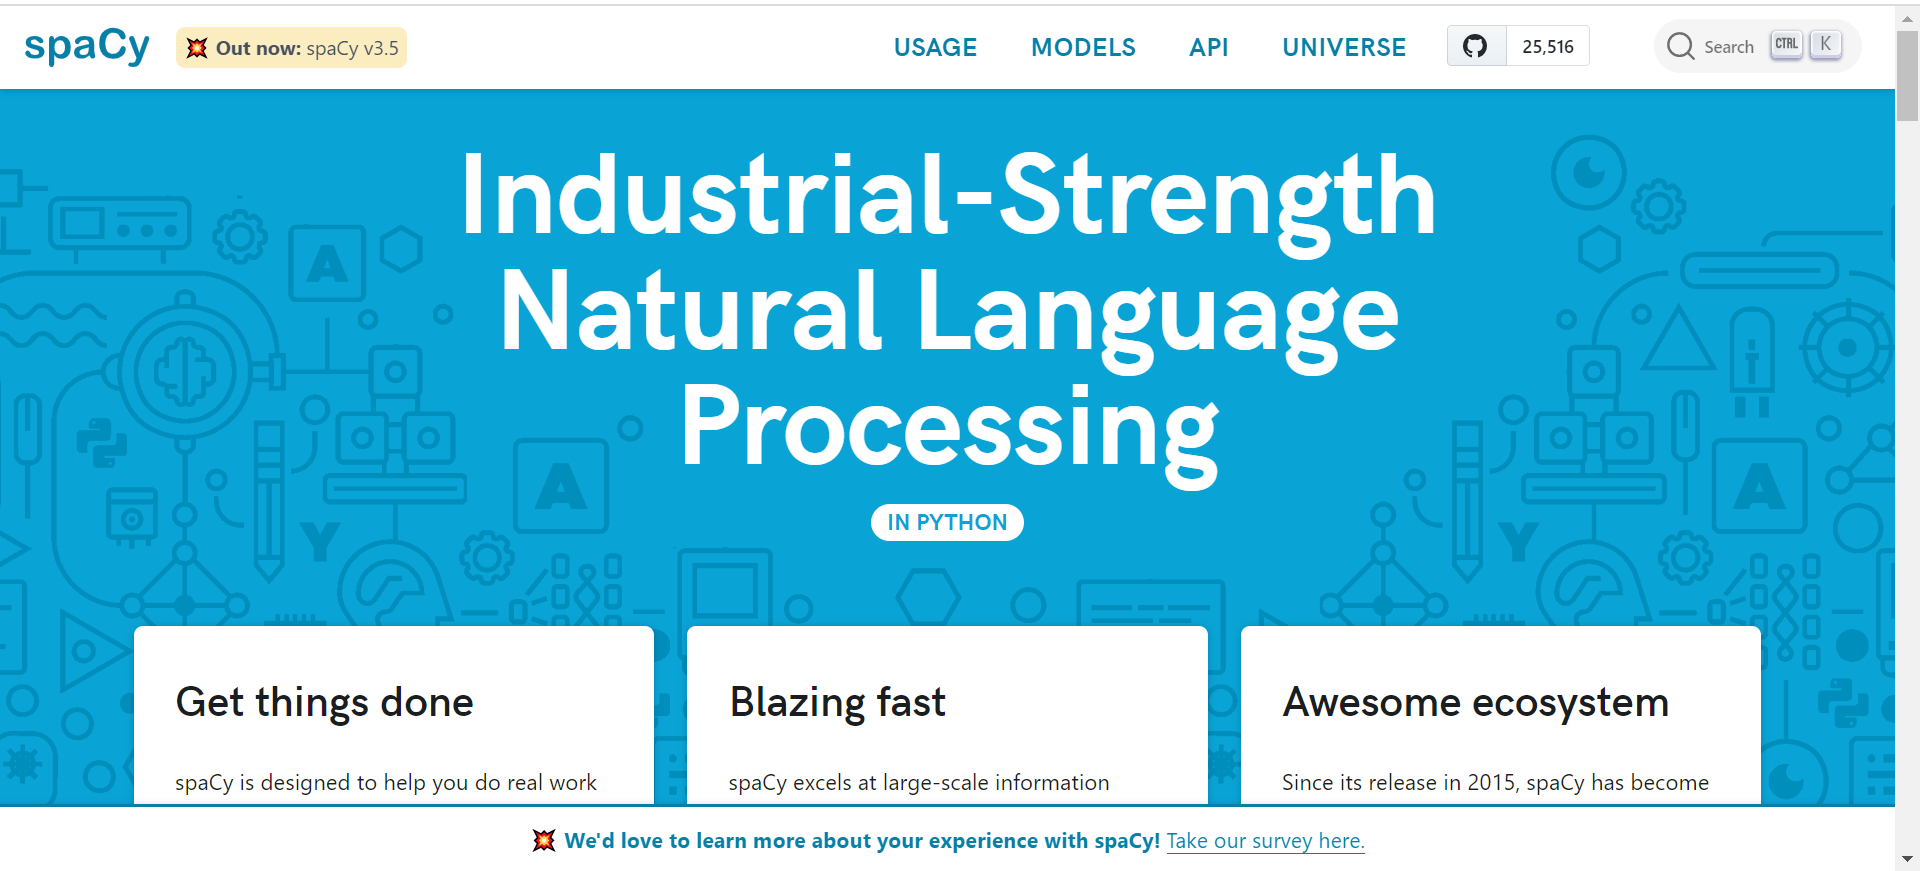

In [2]:
text_data=""" Computer science is the study of computation, automation, and information.[1][2][3] Computer science spans theoretical disciplines (such as algorithms, theory of computation, information theory, and automation) to practical disciplines (including the design and implementation of hardware and software).
[4][5][6] Computer science is generally considered an academic discipline and distinct from computer programming which is considered to be a technical field.[7].
Algorithms and data structures are central to computer science.
[8] The theory of computation concerns abstract models of computation and general classes of problems that can be solved using them. 
The fields of cryptography and computer security involve studying the means for secure communication and for preventing security vulnerabilities.
Computer graphics and computational geometry address the generation of images. 
Programming language theory considers different ways to describe computational processes, and database theory concerns the management of repositories of data. 
Human–computer interaction investigates the interfaces through which humans and computers interact, and software engineering focuses on the design and principles behind developing software. 
Areas such as operating systems, networks and embedded systems investigate the principles and design behind complex systems. 
Computer architecture describes the construction of computer components and computer-operated equipment. 
Artificial intelligence and machine learning aim to synthesize goal-orientated processes such as problem-solving, decision-making, environmental adaptation, planning and learning found in humans and animals. 
Within artificial intelligence, computer vision aims to understand and process image and video data, while natural language processing aims to understand and process textual and linguistic data."""

In [3]:
### how many charecters are there inside this text_data.
len(text_data)

1877

# Importing libraries & dataset

In [4]:
import spacy 
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [5]:
#load the small sized spacy model.
##https://spacy.io/ we can find out the spacy model related document.
nlp=spacy.load("en_core_web_sm")

In [6]:
## we have added our text_data in that nlp model.
doc= nlp(text_data)

In [8]:
##this is our tokens
tokens= [token.text for token in doc]
print(tokens)

[' ', 'Computer', 'science', 'is', 'the', 'study', 'of', 'computation', ',', 'automation', ',', 'and', 'information.[1][2][3', ']', 'Computer', 'science', 'spans', 'theoretical', 'disciplines', '(', 'such', 'as', 'algorithms', ',', 'theory', 'of', 'computation', ',', 'information', 'theory', ',', 'and', 'automation', ')', 'to', 'practical', 'disciplines', '(', 'including', 'the', 'design', 'and', 'implementation', 'of', 'hardware', 'and', 'software', ')', '.', '\n', '[', '4][5][6', ']', 'Computer', 'science', 'is', 'generally', 'considered', 'an', 'academic', 'discipline', 'and', 'distinct', 'from', 'computer', 'programming', 'which', 'is', 'considered', 'to', 'be', 'a', 'technical', 'field.[7', ']', '.', '\n', 'Algorithms', 'and', 'data', 'structures', 'are', 'central', 'to', 'computer', 'science', '.', '\n', '[', '8', ']', 'The', 'theory', 'of', 'computation', 'concerns', 'abstract', 'models', 'of', 'computation', 'and', 'general', 'classes', 'of', 'problems', 'that', 'can', 'be', 's

In [10]:
### add punctuation of this text
punctuation = punctuation +'\n'
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~




# Text Cleaning

In [13]:
##create word frequncy of the word and create word_freq dict object
word_freq ={}
stop_words = list(STOP_WORDS)
for word in doc:
    if word.text.lower() not in stop_words:
      if word.text.lower() not in punctuation:
        #all punctation marks got deleted
        #print(word)
          if word.text not in word_freq.keys():
            word_freq[word.text] =1
          else:
            word_freq[word.text] +=1

In [14]:
## how many items article has appeared
print(word_freq)

{' ': 1, 'Computer': 5, 'science': 4, 'study': 1, 'computation': 4, 'automation': 2, 'information.[1][2][3': 1, 'spans': 1, 'theoretical': 1, 'disciplines': 2, 'algorithms': 1, 'theory': 5, 'information': 1, 'practical': 1, 'including': 1, 'design': 3, 'implementation': 1, 'hardware': 1, 'software': 3, '4][5][6': 1, 'generally': 1, 'considered': 2, 'academic': 1, 'discipline': 1, 'distinct': 1, 'computer': 7, 'programming': 1, 'technical': 1, 'field.[7': 1, 'Algorithms': 1, 'data': 4, 'structures': 1, 'central': 1, '8': 1, 'concerns': 2, 'abstract': 1, 'models': 1, 'general': 1, 'classes': 1, 'problems': 1, 'solved': 1, 'fields': 1, 'cryptography': 1, 'security': 2, 'involve': 1, 'studying': 1, 'means': 1, 'secure': 1, 'communication': 1, 'preventing': 1, 'vulnerabilities': 1, 'graphics': 1, 'computational': 2, 'geometry': 1, 'address': 1, 'generation': 1, 'images': 1, 'Programming': 1, 'language': 2, 'considers': 1, 'different': 1, 'ways': 1, 'describe': 1, 'processes': 2, 'database':

In [17]:
#max value of this word frquency
max_freq= max(word_freq.values())
print(max_freq)

7


In [18]:
for word in word_freq.keys():
  word_freq[word] = word_freq[word] / max_freq

In [19]:
##All score will be normalized. unique word appear in our article.
print(word_freq)

{' ': 0.14285714285714285, 'Computer': 0.7142857142857143, 'science': 0.5714285714285714, 'study': 0.14285714285714285, 'computation': 0.5714285714285714, 'automation': 0.2857142857142857, 'information.[1][2][3': 0.14285714285714285, 'spans': 0.14285714285714285, 'theoretical': 0.14285714285714285, 'disciplines': 0.2857142857142857, 'algorithms': 0.14285714285714285, 'theory': 0.7142857142857143, 'information': 0.14285714285714285, 'practical': 0.14285714285714285, 'including': 0.14285714285714285, 'design': 0.42857142857142855, 'implementation': 0.14285714285714285, 'hardware': 0.14285714285714285, 'software': 0.42857142857142855, '4][5][6': 0.14285714285714285, 'generally': 0.14285714285714285, 'considered': 0.2857142857142857, 'academic': 0.14285714285714285, 'discipline': 0.14285714285714285, 'distinct': 0.14285714285714285, 'computer': 1.0, 'programming': 0.14285714285714285, 'technical': 0.14285714285714285, 'field.[7': 0.14285714285714285, 'Algorithms': 0.14285714285714285, 'dat

# Sentence tokenization

In [20]:
sent_tokens = [sent for sent in doc.sents]
print(sent_tokens)

[ Computer science is the study of computation, automation, and information.[1][2][3], Computer science spans theoretical disciplines (such as algorithms, theory of computation, information theory, and automation) to practical disciplines (including the design and implementation of hardware and software).
, [4][5][6] Computer science is generally considered an academic discipline and distinct from computer programming which is considered to be a technical field.[7].
, Algorithms and data structures are central to computer science.
, [8] The theory of computation concerns abstract models of computation and general classes of problems that can be solved using them. 
, The fields of cryptography and computer security involve studying the means for secure communication and for preventing security vulnerabilities.
, Computer graphics and computational geometry address the generation of images. 
, Programming language theory considers different ways to describe computational processes, and d

In [22]:
#dict hold indivdual sentence of score
sent_score={}
for sent in sent_tokens:
    for word in sent:
       #print(word)
       if word.text.lower() in word_freq.keys():
          if sent not in sent_score.keys():
              sent_score[sent] = word_freq[word.text.lower()]
          else:
              sent_score[sent] += word_freq[word.text.lower()] 

In [23]:
##create sent score.
print(sent_score)

{ Computer science is the study of computation, automation, and information.[1][2][3]: 2.8571428571428568, Computer science spans theoretical disciplines (such as algorithms, theory of computation, information theory, and automation) to practical disciplines (including the design and implementation of hardware and software).
: 6.42857142857143, [4][5][6] Computer science is generally considered an academic discipline and distinct from computer programming which is considered to be a technical field.[7].
: 4.285714285714286, Algorithms and data structures are central to computer science.
: 2.571428571428571, [8] The theory of computation concerns abstract models of computation and general classes of problems that can be solved using them. 
: 3.1428571428571423, The fields of cryptography and computer security involve studying the means for secure communication and for preventing security vulnerabilities.
: 2.8571428571428563, Computer graphics and computational geometry address the gene

#Select 30% sentences with maximum score

In [25]:
from heapq import nlargest
len(sent_score) * 0.3

3.9

# Getting the summary

In [26]:
summary = nlargest(n=4,iterable=sent_score,key=sent_score.get) 
print(summary)

[Computer science spans theoretical disciplines (such as algorithms, theory of computation, information theory, and automation) to practical disciplines (including the design and implementation of hardware and software).
, Within artificial intelligence, computer vision aims to understand and process image and video data, while natural language processing aims to understand and process textual and linguistic data., [4][5][6] Computer science is generally considered an academic discipline and distinct from computer programming which is considered to be a technical field.[7].
, Programming language theory considers different ways to describe computational processes, and database theory concerns the management of repositories of data. 
]


In [27]:
final_summary = [word.text for word in summary]
print(final_summary)

['Computer science spans theoretical disciplines (such as algorithms, theory of computation, information theory, and automation) to practical disciplines (including the design and implementation of hardware and software).\n', 'Within artificial intelligence, computer vision aims to understand and process image and video data, while natural language processing aims to understand and process textual and linguistic data.', '[4][5][6] Computer science is generally considered an academic discipline and distinct from computer programming which is considered to be a technical field.[7].\n', 'Programming language theory considers different ways to describe computational processes, and database theory concerns the management of repositories of data. \n']


In [28]:
summary = "".join(final_summary)
print(summary)

Computer science spans theoretical disciplines (such as algorithms, theory of computation, information theory, and automation) to practical disciplines (including the design and implementation of hardware and software).
Within artificial intelligence, computer vision aims to understand and process image and video data, while natural language processing aims to understand and process textual and linguistic data.[4][5][6] Computer science is generally considered an academic discipline and distinct from computer programming which is considered to be a technical field.[7].
Programming language theory considers different ways to describe computational processes, and database theory concerns the management of repositories of data. 



In [29]:
len(summary)

736